In [1]:
import random 
import numpy as np 
from deap import base, creator, tools, algorithms 

import matplotlib.pyplot as plt 

In [2]:
seed = 42

random.seed(seed)

num_items = 9
max_weight = 16
max_volume = 10

jewelry = [(random.randint(1, 3), random.randint(1, 2), random.randint(30, 100)) for _ in range(num_items // 3)]
furniture = [(random.randint(3, 9), random.randint(2, 6), random.randint(5, 30)) for _ in range(num_items // 3)]
gear = [(random.randint(1, 6), random.randint(1, 4), random.randint(15, 50)) for _ in range(num_items // 3)]
items = jewelry + furniture + gear
random.shuffle(items)
items # (weight, volume, value)




[(3, 2, 11),
 (3, 1, 33),
 (8, 6, 7),
 (7, 5, 6),
 (3, 2, 61),
 (2, 4, 29),
 (4, 3, 15),
 (2, 1, 50),
 (1, 1, 43)]

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax) 

In [4]:
num_items = len(items) 
toolbox = base.Toolbox() 

toolbox.register("attr_binary", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_binary, n=num_items)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 

In [5]:
def evaluate(individual, items, max_weight, max_volume):
    total_weight = sum(items[i][0] for i, v in enumerate(individual) if v == 1)
    total_volume = sum(items[i][1] for i, v in enumerate(individual) if v == 1)
    total_value = sum(items[i][2] for i, v in enumerate(individual) if v == 1)
    
  
    if total_weight > max_weight or total_volume > max_volume:
      return (0,)
    return (total_value,)
  


In [6]:
from functools import partial

toolbox.register("evaluate", partial(evaluate, items=items, max_weight=max_weight, max_volume=max_volume))
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [14]:
random.seed(seed)

pop = toolbox.population(n=10)
hof = tools.HallOfFame(1) 

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", lambda vals: round(np.mean([v[0] for v in vals]), 2))
stats.register("std", lambda vals: round(np.std([v[0] for v in vals]), 2))
stats.register("min", lambda vals: round(min(v[0] for v in vals), 2))
stats.register("max", lambda vals: round(max(v[0] for v in vals), 2))

population, logbook = algorithms.eaSimple(population=pop, 
                        toolbox=toolbox, 
                        cxpb=0.7, 
                        mutpb=0.5,
                        ngen=200, 
                        stats=stats, 
                        halloffame=hof,
                        verbose=True)

best_ind = hof[0]
best_value = best_ind.fitness.values[0]
best_weight = sum(items[i][0] for i, v in enumerate(best_ind) if v == 1)
best_volume = sum(items[i][1] for i, v in enumerate(best_ind) if v == 1)

print(f"""
✅ Best Knapsack Solution:
   - Items Taken: {best_ind}
   - Total Value: {best_value}
   - Total Weight: {best_weight} / {max_weight}
   - Total Volume: {best_volume} / {max_volume}
""")

gen	nevals	avg 	std  	min	max
0  	10    	58.4	74.41	0  	213
1  	7     	106 	62.25	0  	213
2  	8     	160.9	62.11	0  	213
3  	8     	155.1	79.48	0  	213
4  	7     	197.7	19.03	169	213
5  	10    	201.4	18.25	163	213
6  	9     	203.6	19.82	152	213
7  	8     	205.8	18.23	152	213
8  	9     	213  	0    	213	213
9  	6     	200.8	24.4 	152	213
10 	9     	211.5	4.5  	198	213
11 	10    	160.4	82.5 	0  	213
12 	8     	208  	15   	163	213
13 	8     	213  	0    	213	213
14 	10    	170.4	85.2 	0  	213
15 	8     	197.6	23.55	159	213
16 	7     	210.4	5.28 	198	213
17 	7     	213  	0    	213	213
18 	9     	206.9	15   	163	213
19 	8     	203  	20   	163	213
20 	9     	211.5	4.5  	198	213
21 	10    	149.1	97.61	0  	213
22 	8     	211.5	4.5  	198	213
23 	10    	166.1	84.02	0  	213
24 	10    	190.2	63.56	0  	213
25 	10    	208.7	12.9 	170	213
26 	9     	211.5	4.5  	198	213
27 	10    	191.7	63.9 	0  	213
28 	10    	213  	0    	213	213
29 	10    	184.1	63.21	0  	213
30 	9     	191.7	63.9 	0  	213
31 	10    	

In [17]:
items_taken = [items[i] for i, v in enumerate(best_ind) if v == 1]
print("Total items", items)
print("Items taken:", items_taken)

Total items [(3, 2, 11), (3, 1, 33), (8, 6, 7), (7, 5, 6), (3, 2, 61), (2, 4, 29), (4, 3, 15), (2, 1, 50), (1, 1, 43)]
Items taken: [(3, 1, 33), (3, 2, 61), (2, 4, 29), (2, 1, 50), (1, 1, 43)]


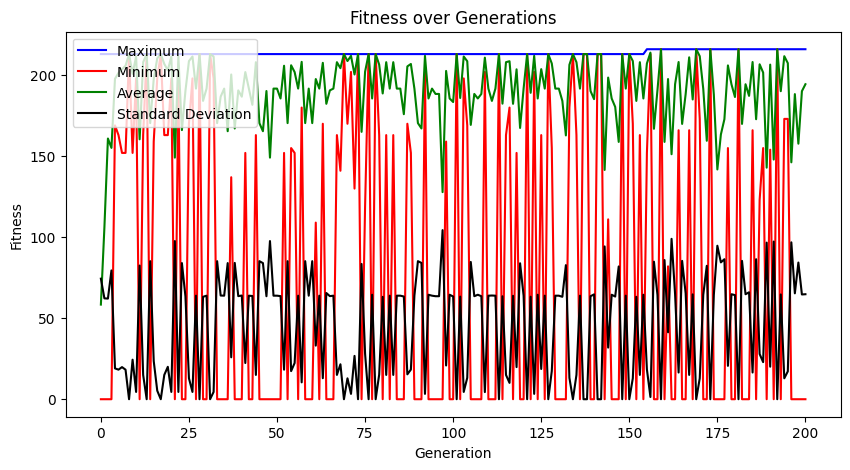

In [16]:
plt.figure(figsize=(10, 5)) 
gen = logbook.select("gen")
fit_mins = logbook.select("min")
fit_maxs = logbook.select("max")
fit_avgs = logbook.select("avg")
fit_stds = logbook.select("std")  

plt.plot(gen, fit_maxs, "b-", label="Maximum")
plt.plot(gen, fit_mins, "r-", label="Minimum")
plt.plot(gen, fit_avgs, "g-", label="Average")
plt.plot(gen, fit_stds, "k-", label="Standard Deviation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper left")
plt.title("Fitness over Generations")
plt.show()